In [1]:
from littlefish.core import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
simulation_folder = r"F:\little_fish_simulation_logs_4"
min_generation = 20
max_generation = 38

population_size = 1000
turnover_rate = 0.9

mother_fish_num = int(population_size * (1 - turnover_rate))

In [3]:
life_span_df = plotting.collect_life_spans(
    simulation_folder,
    min_generation=min_generation,  # 0
    max_generation=max_generation,  # 25
)

reading generation_0000020, 1 / 19 ...
reading generation_0000021, 2 / 19 ...
reading generation_0000022, 3 / 19 ...
reading generation_0000023, 4 / 19 ...
reading generation_0000024, 5 / 19 ...
reading generation_0000025, 6 / 19 ...
reading generation_0000026, 7 / 19 ...
reading generation_0000027, 8 / 19 ...
reading generation_0000028, 9 / 19 ...
reading generation_0000029, 10 / 19 ...
reading generation_0000030, 11 / 19 ...
reading generation_0000031, 12 / 19 ...
reading generation_0000032, 13 / 19 ...
reading generation_0000033, 14 / 19 ...
reading generation_0000034, 15 / 19 ...
reading generation_0000035, 16 / 19 ...
reading generation_0000036, 17 / 19 ...
reading generation_0000037, 18 / 19 ...
reading generation_0000038, 19 / 19 ...


In [4]:
life_span_df.sort_values(by="life_span")

,generation,fish_name,life_span,is_from_last_geneartion
7266,27,b'fish_241107_16_52_26.838998',34,False
1766,21,b'fish_241106_08_12_10.326544',35,False
10487,30,b'fish_241107_18_01_33.322845',37,False
7394,27,b'fish_241107_16_52_33.238477',37,False
1471,21,b'fish_241106_08_11_46.271400',37,False
...,...,...,...,...
3822,23,b'fish_241106_09_45_55.472252',14469,False
10846,30,b'fish_241107_18_01_52.710059',15254,False
247,20,b'fish_241106_04_28_32.804974',15937,True
7642,27,b'fish_241107_16_52_45.935140',19849,False


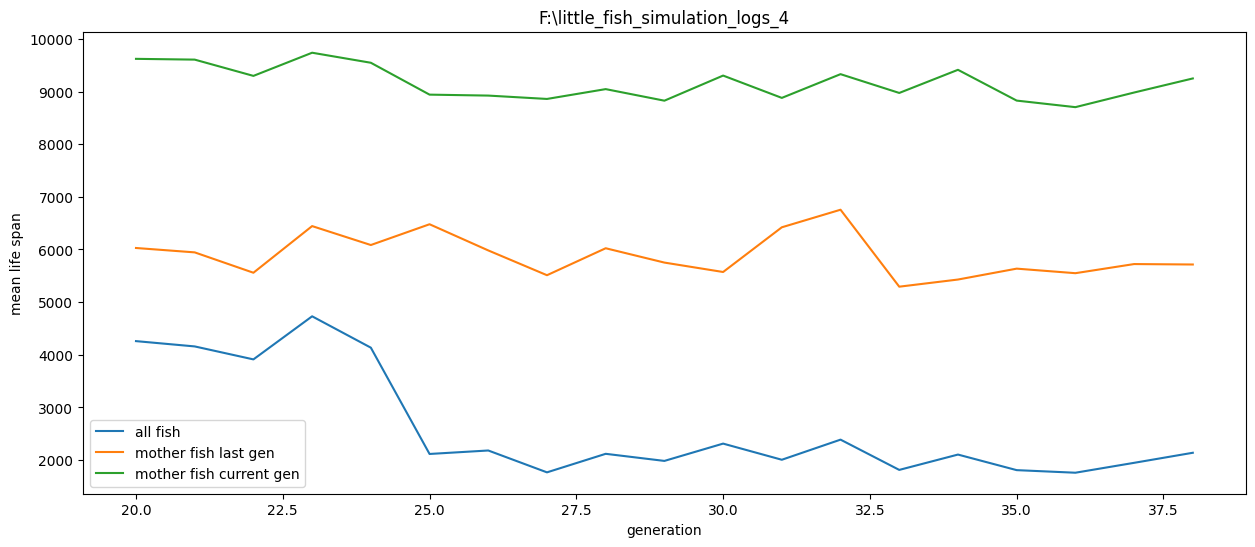

In [5]:
gens = sorted(life_span_df["generation"].unique())
mean_life_span = []
mean_mo_life_last_gen = []
mean_mo_life_curr_gen = []
for gen in gens:
    curr_life_span = sorted(life_span_df.query("generation == @gen")["life_span"])
    mean_life_span.append(np.mean(curr_life_span))
    mean_mo_life_last_gen.append(np.mean(life_span_df.query("generation == @gen and is_from_last_geneartion")["life_span"]))
    mean_mo_life_curr_gen.append(np.mean(curr_life_span[-mother_fish_num:]))

f, ax = plt.subplots(figsize=(15, 6))
ax.plot(gens, mean_life_span, label="all fish")
ax.plot(gens, mean_mo_life_last_gen, label="mother fish last gen")
ax.plot(gens, mean_mo_life_curr_gen, label="mother fish current gen")
ax.set_xlabel("generation")
ax.set_ylabel("mean life span")
ax.set_title(simulation_folder)
ax.legend()

(0.0, 20000.0)

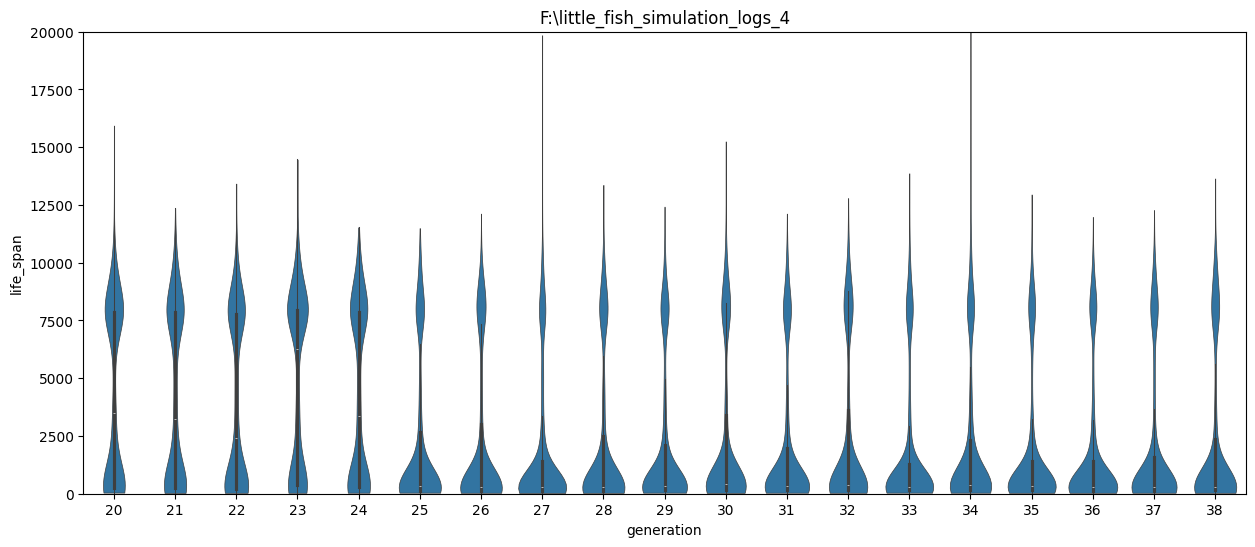

In [6]:
f, ax = plt.subplots(figsize=(15, 6))
ax.set_title(simulation_folder)
sns.violinplot(
    data=life_span_df, x="generation", y="life_span", ax=ax, cut=0, linewidth=0.5,
)
ax.set_ylim([0, 20000])

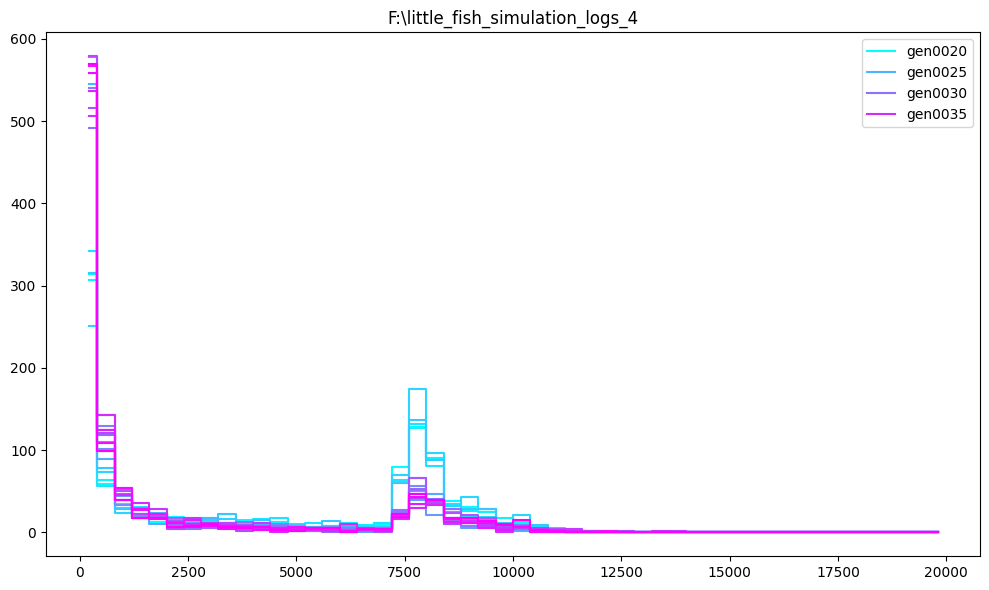

In [7]:
f, ax = plt.subplots(figsize=(10, 6))
ax.set_title(simulation_folder)
plotting.plot_simulation_life_spans(
    life_span_df, ax, max_life_span=20000, bins=50, legend_gap=5, 
)
ax.legend()
plt.tight_layout()